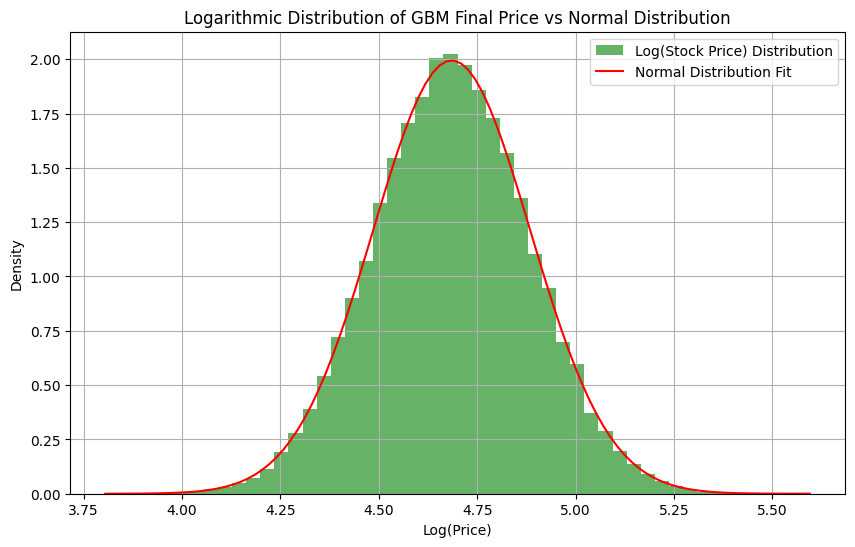

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ設定
mu = 0.1     # ドリフト（平均成長率）
sigma = 0.2  # ボラティリティ（価格の変動性）
S0 = 100     # 初期価格
T = 1        # シミュレーションの期間（1年）
N = 1000     # シミュレーションのステップ数
M = 50000    # シミュレーション回数（パス数）
dt = T / N   # 時間ステップ

# 幾何ブラウン運動のシミュレーション
np.random.seed(42)  # 再現性のための乱数シード
t = np.linspace(0, T, N+1)  # 時間軸

# 価格を保存する配列
S = np.zeros((M, N+1))
S[:, 0] = S0

# シミュレーション
for i in range(M):
    dW = np.random.normal(0, np.sqrt(dt), N)  # 標準ブラウン運動の変動
    S[i, 1:] = S[i, 0] * np.exp(np.cumsum((mu - 0.5 * sigma**2) * dt + sigma * dW))

# 最終時刻の価格の対数を計算
log_S_final = np.log(S[:, -1])

# 対数正規分布に近いかを確認するためにヒストグラムを表示
plt.figure(figsize=(10, 6))

# 最終時刻の価格のヒストグラム
plt.hist(log_S_final, bins=50, density=True, alpha=0.6, color='g', label='Log(Stock Price) Distribution')

# 正規分布の理論的な形をオーバーレイ
mu_log = np.log(S0) + mu * T - 0.5 * sigma**2 * T
std_log = sigma * np.sqrt(T)
x = np.linspace(min(log_S_final), max(log_S_final), 100)
pdf = (1 / (std_log * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu_log) / std_log)**2)
plt.plot(x, pdf, 'r', label='Normal Distribution Fit')

plt.title('Logarithmic Distribution of GBM Final Price vs Normal Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


# 主要な部分の説明：
パラメータ設定：

- mu: ドリフト（平均成長率）
- sigma: ボラティリティ（価格の変動性）
- S0: 初期株価
- T: シミュレーション期間（1年）
- N: シミュレーションの時間ステップ数
- M: シミュレーション回数（パス数）
- dt: 各時間ステップの間隔

# シミュレーション：

幾何ブラウン運動をシミュレートし、np.exp()を使用して、各時点での株価を計算します。価格は、ランダムなノイズ（標準ブラウン運動）を加えながら進化します。

# ヒストグラムの作成：

シミュレーション後の最終時刻の価格の対数を取り、そのヒストグラムを描画します。
また、その対数分布が正規分布に近いかを確認するために、理論的な正規分布をオーバーレイします。

# 結果：

このシミュレーションを実行すると、対数株価の分布が正規分布に近づく様子を確認できます。GBMの性質上、株価そのものは対数正規分布に従い、最終的にはその対数が正規分布に従うことが分かります。

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 時間と空間のパラメータ
T = 1.0            # 時間の長さ
N = 100            # 時間のステップ数
M = 100            # 空間のステップ数
dt = T / N         # 時間のステップ幅
dx = 0.05          # 空間のステップ幅

# 空間の範囲
x = np.linspace(-2, 2, M)

# 初期分布（ガウス分布）
p0 = np.exp(-x**2 / 0.1)

# シミュレーション用の関数
def fpe_brownian(p, dx, dt):
    """ ブラウン運動のフォッカープランク方程式 """
    p_new = p.copy()
    for i in range(1, len(x)-1):
        p_new[i] = p[i] + 0.5 * dt * (p[i+1] - 2*p[i] + p[i-1]) / dx**2
    return p_new

def fpe_gbm(p, x, mu, sigma, dx, dt):
    """ 幾何ブラウン運動のフォッカープランク方程式 """
    p_new = p.copy()
    for i in range(1, len(x)-1):
        drift = (mu * x[i] * p[i] - (mu * x[i]) * p[i]) * dt
        diff = 0.5 * sigma**2 * (x[i]**2 * (p[i+1] - 2 * p[i] + p[i-1])) * dt / dx**2
        p_new[i] = p[i] + drift + diff
    return p_new

def fpe_ou(p, x, mu, theta, sigma, dx, dt):
    """ オーンシュタイン・ウーレンベック過程のフォッカープランク方程式 """
    p_new = p.copy()
    for i in range(1, len(x)-1):
        drift = theta * (mu - x[i]) * (p[i+1] - p[i-1]) / (2 * dx)
        diff = 0.5 * sigma**2 * (p[i+1] - 2*p[i] + p[i-1]) / dx**2
        p_new[i] = p[i] + drift + diff
    return p_new

# シミュレーションの実行
p_brownian = p0.copy()
p_gbm = p0.copy()
p_ou = p0.copy()

# 時間の経過をシミュレート
for t in range(N):
    p_brownian = fpe_brownian(p_brownian, dx, dt)
    p_gbm = fpe_gbm(p_gbm, x, dx, dt, mu=0.1, sigma=0.2)
    p_ou = fpe_ou(p_ou, x, dx, dt, mu=0, theta=1, sigma=0.1)

# 結果のプロット
plt.figure(figsize=(14, 6))

# ブラウン運動の結果
plt.subplot(1, 3, 1)
plt.plot(x, p_brownian, label="Brownian Motion", color="b")
plt.title("Brownian Motion")
plt.xlabel("x")
plt.ylabel("p(x,t)")

# 幾何ブラウン運動の結果
plt.subplot(1, 3, 2)
plt.plot(x, p_gbm, label="Geometric Brownian Motion", color="g")
plt.title("Geometric Brownian Motion")
plt.xlabel("x")
plt.ylabel("p(x,t)")

# オーンシュタイン・ウーレンベック過程の結果
plt.subplot(1, 3, 3)
plt.plot(x, p_ou, label="Ornstein-Uhlenbeck Process", color="r")
plt.title("Ornstein-Uhlenbeck Process")
plt.xlabel("x")
plt.ylabel("p(x,t)")

plt.tight_layout()
plt.show()


TypeError: fpe_gbm() got multiple values for argument 'mu'